# Use decision trees and random forest to prepare a model on fraud data 
## treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#! pip install imblearn

In [2]:
fraud = pd.read_csv('Fraud_check.csv')

In [3]:
fraud.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [4]:
fraud.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [5]:
fraud_new=fraud.rename({"Marital.Status":"Marital_Status","Undergrad":"Under_Grad","Taxable.Income":"Taxable_Income","City.Population":"City_Population","Work.Experience":"Work_Experience"},axis=1)

In [6]:
fraud_new

Under_Grad Marital_Status  Taxable_Income  City_Population  \
0           NO         Single           68833            50047   
1          YES       Divorced           33700           134075   
2           NO        Married           36925           160205   
3          YES         Single           50190           193264   
4           NO        Married           81002            27533   
..         ...            ...             ...              ...   
595        YES       Divorced           76340            39492   
596        YES       Divorced           69967            55369   
597         NO       Divorced           47334           154058   
598        YES        Married           98592           180083   
599         NO       Divorced           96519           158137   

     Work_Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [7]:
fraud_new.duplicated().sum()

0

In [8]:
fraud_new.isnull().sum()

Under_Grad         0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [9]:
fraud_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Under_Grad       600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
fraud_new.shape

(600, 6)

In [11]:
df1=pd.Series(fraud_new['Taxable_Income'])
s=[]
for i in df1:
    if i<=30000:
        s.append('Risky')
    
    else:
        s.append('Good')

print(s)

['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Ris

In [12]:
df2=pd.DataFrame(s)
fraud_final=pd.concat([df2,fraud_new],axis=1)
fraud_final=fraud_final.rename({0:'Tax_Income'},axis=1)
fraud_final

Tax_Income Under_Grad Marital_Status  Taxable_Income  City_Population  \
0         Good         NO         Single           68833            50047   
1         Good        YES       Divorced           33700           134075   
2         Good         NO        Married           36925           160205   
3         Good        YES         Single           50190           193264   
4         Good         NO        Married           81002            27533   
..         ...        ...            ...             ...              ...   
595       Good        YES       Divorced           76340            39492   
596       Good        YES       Divorced           69967            55369   
597       Good         NO       Divorced           47334           154058   
598       Good        YES        Married           98592           180083   
599       Good         NO       Divorced           96519           158137   

     Work_Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 7 columns]

In [13]:
fraud_final.drop("Taxable_Income",axis=1,inplace=True)

In [14]:
fraud_final

Tax_Income Under_Grad Marital_Status  City_Population  Work_Experience  \
0         Good         NO         Single            50047               10   
1         Good        YES       Divorced           134075               18   
2         Good         NO        Married           160205               30   
3         Good        YES         Single           193264               15   
4         Good         NO        Married            27533               28   
..         ...        ...            ...              ...              ...   
595       Good        YES       Divorced            39492                7   
596       Good        YES       Divorced            55369                2   
597       Good         NO       Divorced           154058                0   
598       Good        YES        Married           180083               17   
599       Good         NO       Divorced           158137               16   

    Urban  
0     YES  
1     YES  
2     YES  
3     YES  
4      NO  
..    ...  
595   YES  
596   YES  
597   YES  
598    NO  
599    NO  

[600 rows x 6 columns]

In [15]:
fraud_final["Tax_Income"].value_counts()

Good     476
Risky    124
Name: Tax_Income, dtype: int64

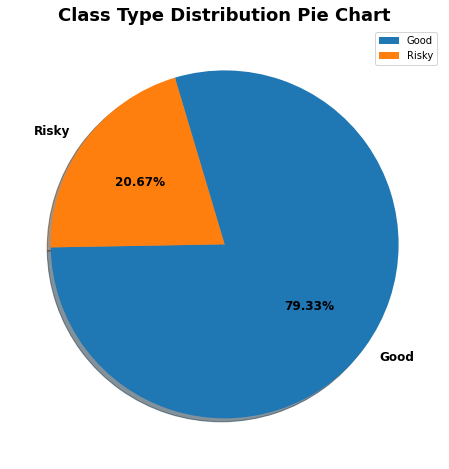

In [16]:
plt.figure(figsize = (12,8))
plt.pie(fraud_final['Tax_Income'].value_counts(),
       labels=fraud_final.Tax_Income.unique(),
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Good or Risky for Tax_Income')

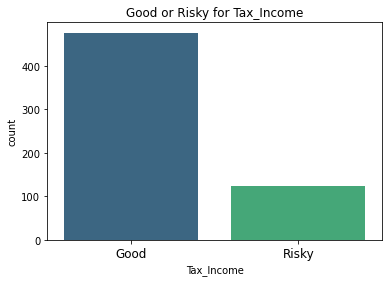

In [17]:
sns.countplot(x='Tax_Income', data=fraud_final, palette = 'viridis', 
              order=fraud_final['Tax_Income'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Good or Risky for Tax_Income')

Text(0.5, 1.0, 'Correlation with Sales \n')

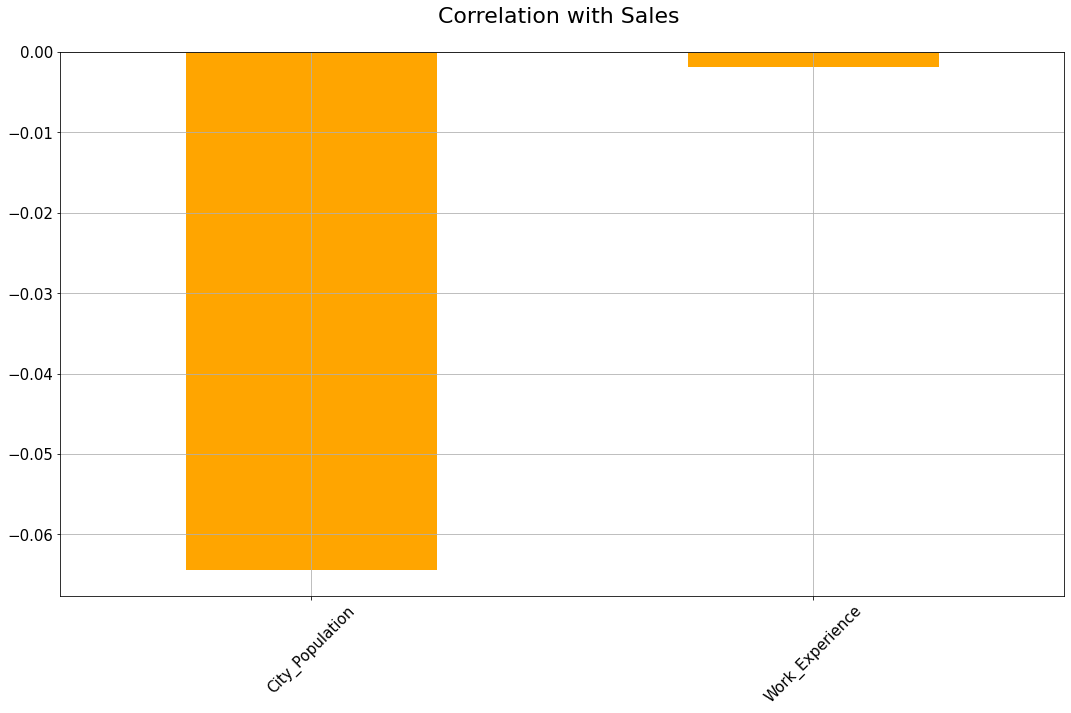

In [18]:
data = fraud_new.copy()

correlations = data.corrwith(fraud_new.Taxable_Income)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [19]:
fraud_final['Tax_Income']=fraud_final['Tax_Income'].map({"Good":1,"Risky":0})

In [20]:
fraud_final

Tax_Income Under_Grad Marital_Status  City_Population  Work_Experience  \
0             1         NO         Single            50047               10   
1             1        YES       Divorced           134075               18   
2             1         NO        Married           160205               30   
3             1        YES         Single           193264               15   
4             1         NO        Married            27533               28   
..          ...        ...            ...              ...              ...   
595           1        YES       Divorced            39492                7   
596           1        YES       Divorced            55369                2   
597           1         NO       Divorced           154058                0   
598           1        YES        Married           180083               17   
599           1         NO       Divorced           158137               16   

    Urban  
0     YES  
1     YES  
2     YES  
3     YES  
4      NO  
..    ...  
595   YES  
596   YES  
597   YES  
598    NO  
599    NO  

[600 rows x 6 columns]

# Coverting Catergorical Variable into Numerical value

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
fraud_final["Under_Grad"]=encoder.fit_transform(fraud_final["Under_Grad"])
fraud_final["Marital_Status"]=encoder.fit_transform(fraud_final["Marital_Status"])
fraud_final["Urban"]=encoder.fit_transform(fraud_final["Urban"])

In [23]:
fraud_final

Tax_Income  Under_Grad  Marital_Status  City_Population  Work_Experience  \
0             1           0               2            50047               10   
1             1           1               0           134075               18   
2             1           0               1           160205               30   
3             1           1               2           193264               15   
4             1           0               1            27533               28   
..          ...         ...             ...              ...              ...   
595           1           1               0            39492                7   
596           1           1               0            55369                2   
597           1           0               0           154058                0   
598           1           1               1           180083               17   
599           1           0               0           158137               16   

     Urban  
0        1  
1        1  
2        1  
3        1  
4        0  
..     ...  
595      1  
596      1  
597      1  
598      0  
599      0  

[600 rows x 6 columns]

# Barplot

<AxesSubplot:xlabel='Tax_Income', ylabel='Under_Grad'>

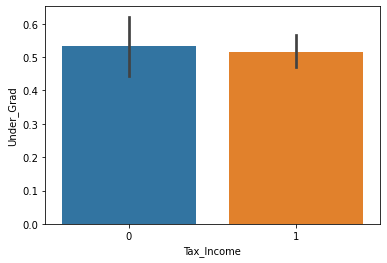

In [24]:
sns.barplot("Tax_Income","Under_Grad",data=fraud_final)

<AxesSubplot:xlabel='Tax_Income', ylabel='Marital_Status'>

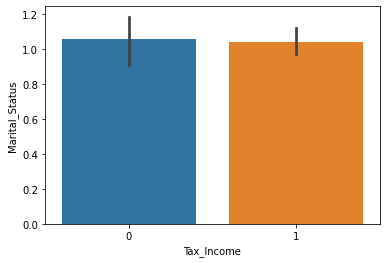

In [25]:
sns.barplot("Tax_Income","Marital_Status",data=fraud_final)

<AxesSubplot:xlabel='Tax_Income', ylabel='City_Population'>

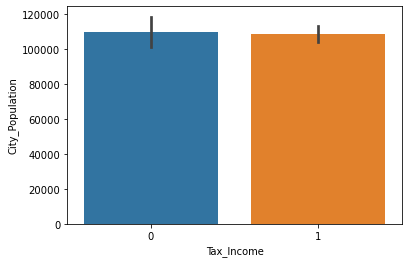

In [26]:
sns.barplot("Tax_Income","City_Population",data=fraud_final)

<AxesSubplot:xlabel='Tax_Income', ylabel='Work_Experience'>

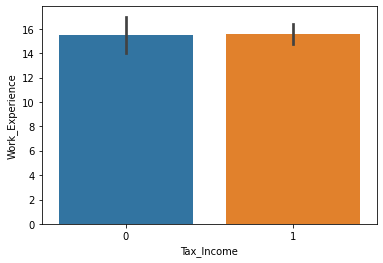

In [27]:
sns.barplot("Tax_Income","Work_Experience",data=fraud_final)

<AxesSubplot:xlabel='Tax_Income', ylabel='Urban'>

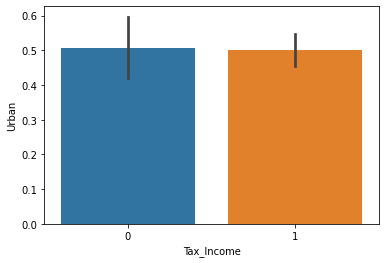

In [28]:
sns.barplot("Tax_Income","Urban",data=fraud_final)

# Pairplot

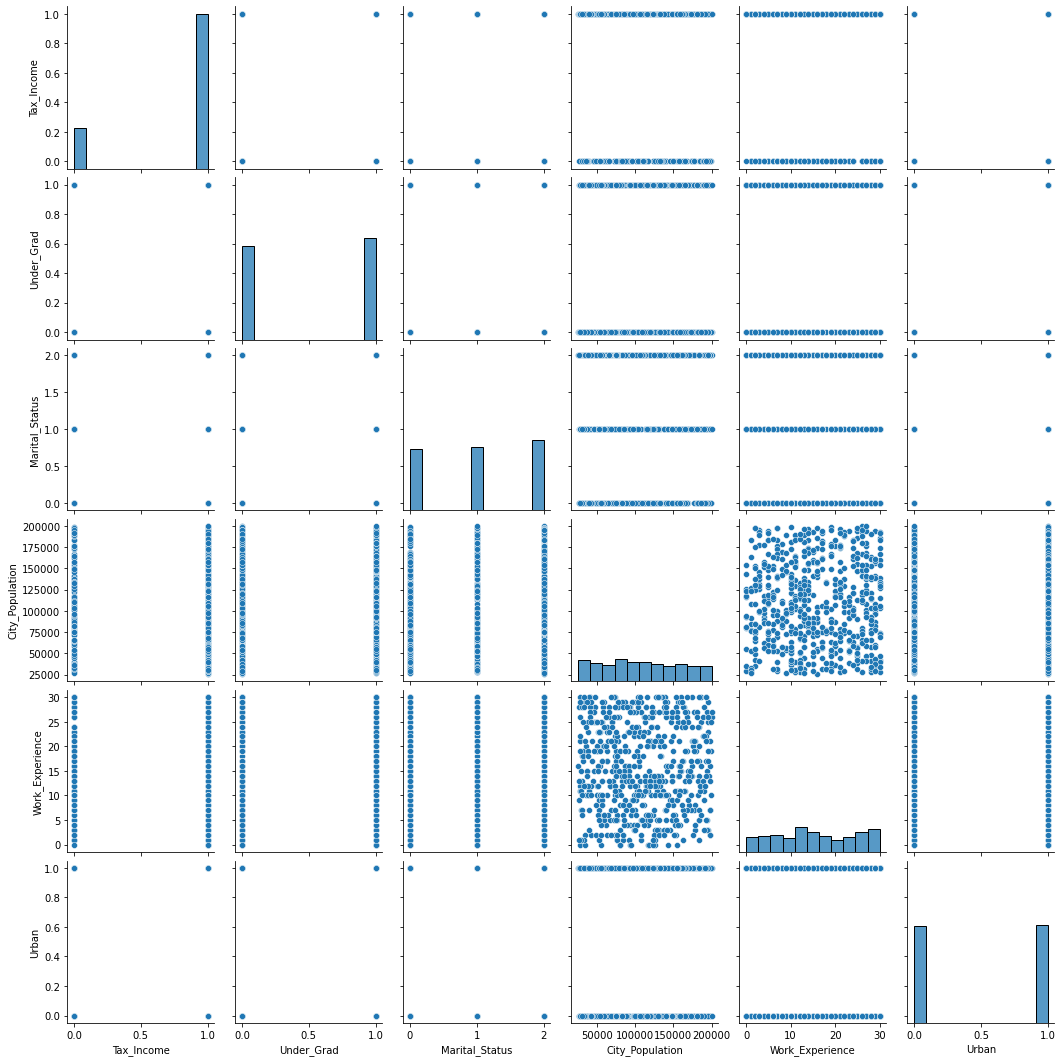

In [29]:
sns.pairplot(fraud_final)

# HeatMap

<AxesSubplot:>

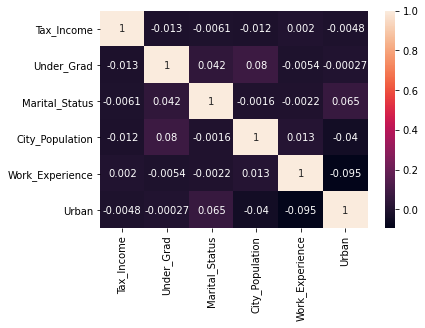

In [30]:
sns.heatmap(data=fraud_final.corr(),annot=True)

# Histogram

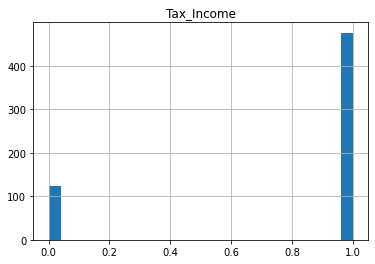

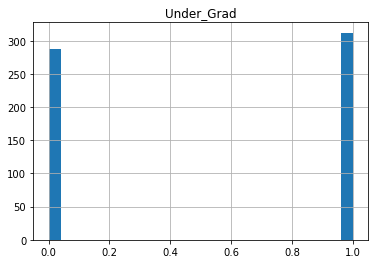

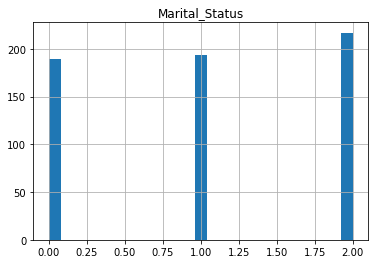

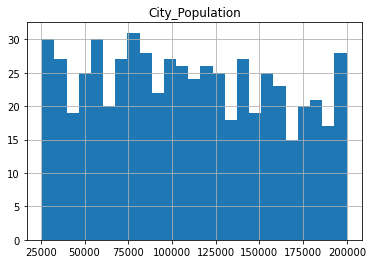

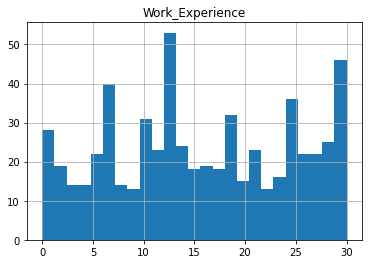

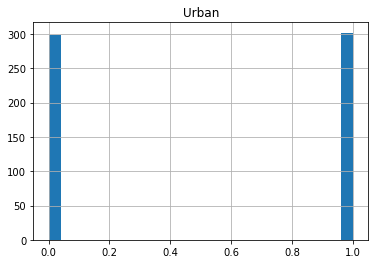

In [31]:
for feature in fraud_final:
    data = fraud_final.copy()
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

# Boxplot for detecting Outlier

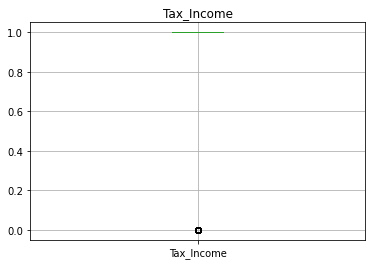

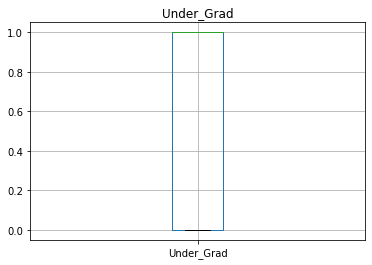

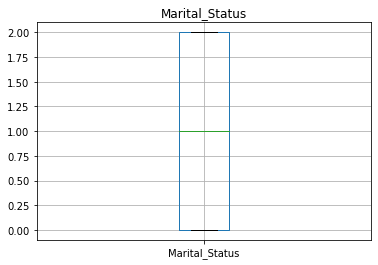

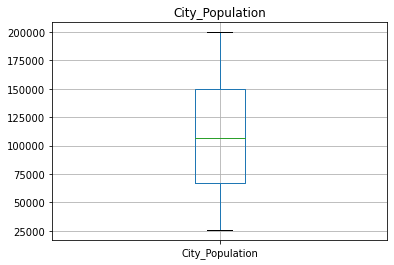

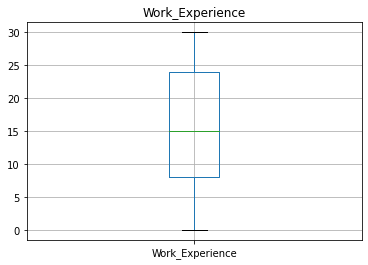

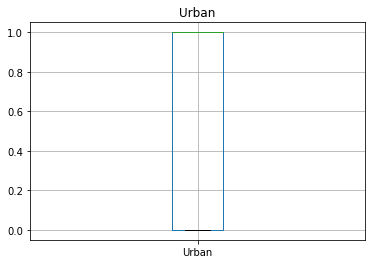

In [32]:
for feature in fraud_final:
    data = fraud_final.copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

# Importing SKLEARN Models

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn import metrics

# Spliting into X and Y

In [34]:
X = fraud_final.iloc[:,1:]
Y= fraud_final[["Tax_Income"]]

In [35]:
X

Under_Grad  Marital_Status  City_Population  Work_Experience  Urban
0             0               2            50047               10      1
1             1               0           134075               18      1
2             0               1           160205               30      1
3             1               2           193264               15      1
4             0               1            27533               28      0
..          ...             ...              ...              ...    ...
595           1               0            39492                7      1
596           1               0            55369                2      1
597           0               0           154058                0      1
598           1               1           180083               17      0
599           0               0           158137               16      0

[600 rows x 5 columns]

In [36]:
X

Under_Grad  Marital_Status  City_Population  Work_Experience  Urban
0             0               2            50047               10      1
1             1               0           134075               18      1
2             0               1           160205               30      1
3             1               2           193264               15      1
4             0               1            27533               28      0
..          ...             ...              ...              ...    ...
595           1               0            39492                7      1
596           1               0            55369                2      1
597           0               0           154058                0      1
598           1               1           180083               17      0
599           0               0           158137               16      0

[600 rows x 5 columns]

In [37]:
Y

Tax_Income
0             1
1             1
2             1
3             1
4             1
..          ...
595           1
596           1
597           1
598           1
599           1

[600 rows x 1 columns]

# For Balancing Data

In [38]:
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.combine import SMOTETomek,SMOTEENN
oversample = SMOTE()
oversample2 = ADASYN()
oversample3 = SMOTETomek()
oversample4 = SMOTEENN()

In [39]:
X_res,Y_res=oversample3.fit_resample(X,Y)

In [40]:
X_res

Under_Grad  Marital_Status  City_Population  Work_Experience  Urban
0             0               2            50047               10      1
1             0               1           160205               30      1
2             1               2           193264               15      1
3             0               1            27533               28      0
4             0               0            80890                8      1
..          ...             ...              ...              ...    ...
667           0               1           190681               21      1
668           1               1            75093                3      0
669           0               1           128961                3      1
670           1               1            87027               18      1
671           1               0           125300               17      0

[672 rows x 5 columns]

In [41]:
Y_res

Tax_Income
0             1
1             1
2             1
3             1
4             1
..          ...
667           0
668           0
669           0
670           0
671           0

[672 rows x 1 columns]

# Spliting Into Train and Test data

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.2,random_state=40)

In [43]:
X_train

Under_Grad  Marital_Status  City_Population  Work_Experience  Urban
374           1               1           199778               27      0
166           0               2            40855               28      1
518           0               1           102770               19      0
64            1               2            64075               23      0
75            0               2            46893               15      0
..          ...             ...              ...              ...    ...
440           0               1           159175               14      0
165           1               2           173228                7      0
7             1               0           155482                4      1
219           0               0           121324               14      1
326           1               2           120012               13      0

[537 rows x 5 columns]

In [44]:
X_test

Under_Grad  Marital_Status  City_Population  Work_Experience  Urban
502           0               1            36189               22      0
264           0               2           140132               27      0
335           0               0            82029               10      0
271           1               2           183094                5      0
574           1               0           115355               17      0
..          ...             ...              ...              ...    ...
580           1               1           158487                9      0
495           0               0           124202                9      1
395           0               0            31064               28      0
435           0               0            82274               12      0
1             0               1           160205               30      1

[135 rows x 5 columns]

In [45]:
Y_train

Tax_Income
374           1
166           1
518           0
64            0
75            1
..          ...
440           0
165           1
7             1
219           1
326           1

[537 rows x 1 columns]

In [46]:
Y_test

Tax_Income
502           0
264           1
335           0
271           1
574           0
..          ...
580           0
495           0
395           1
435           0
1             1

[135 rows x 1 columns]

# Creating Decision Tree using Method=Gini

### Decision Tree using Post Pruning Method

In [47]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

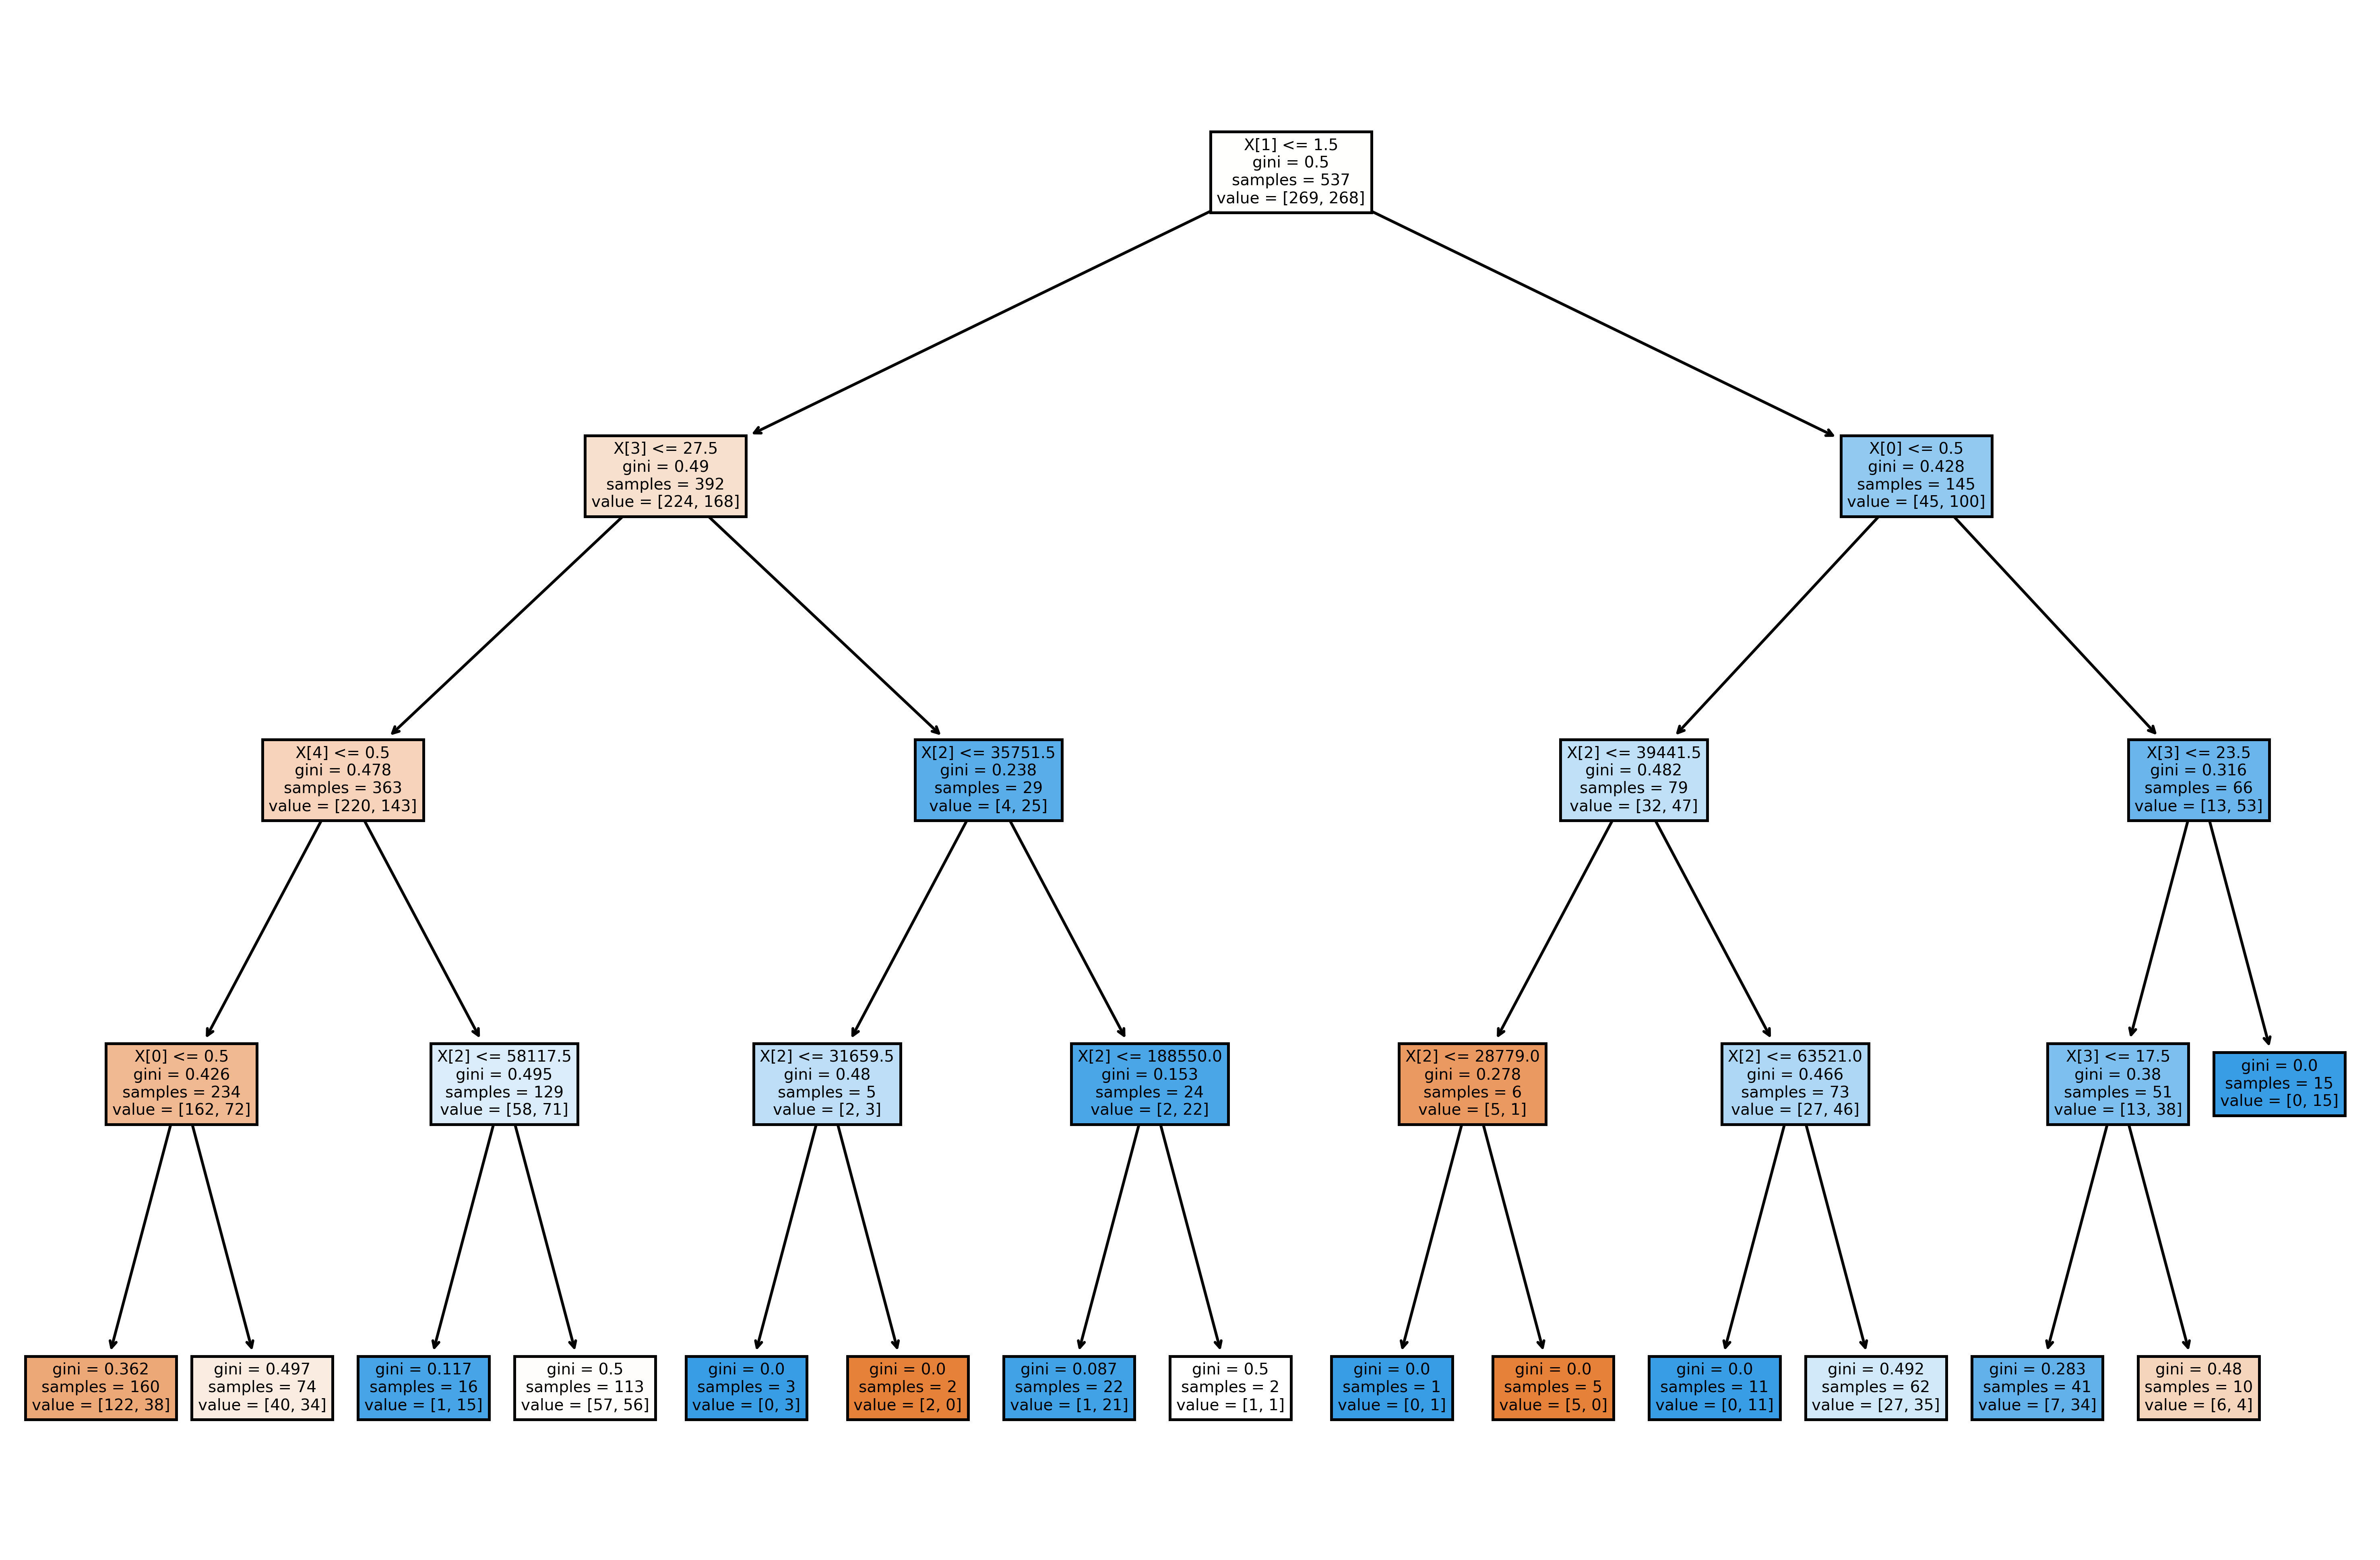

In [48]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model,filled=True);

In [49]:
preds=model.predict(X_test)
pd.Series(preds).value_counts()

0    87
1    48
dtype: int64

In [50]:
metrics.accuracy_score(Y_test,preds)

0.6296296296296297

In [51]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68        67
           1       0.69      0.49      0.57        68

    accuracy                           0.63       135
   macro avg       0.64      0.63      0.62       135
weighted avg       0.64      0.63      0.62       135



# Creating Decision Tree using post pruning method = Gini

In [52]:
model2 = DecisionTreeClassifier(criterion='gini',random_state=0)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

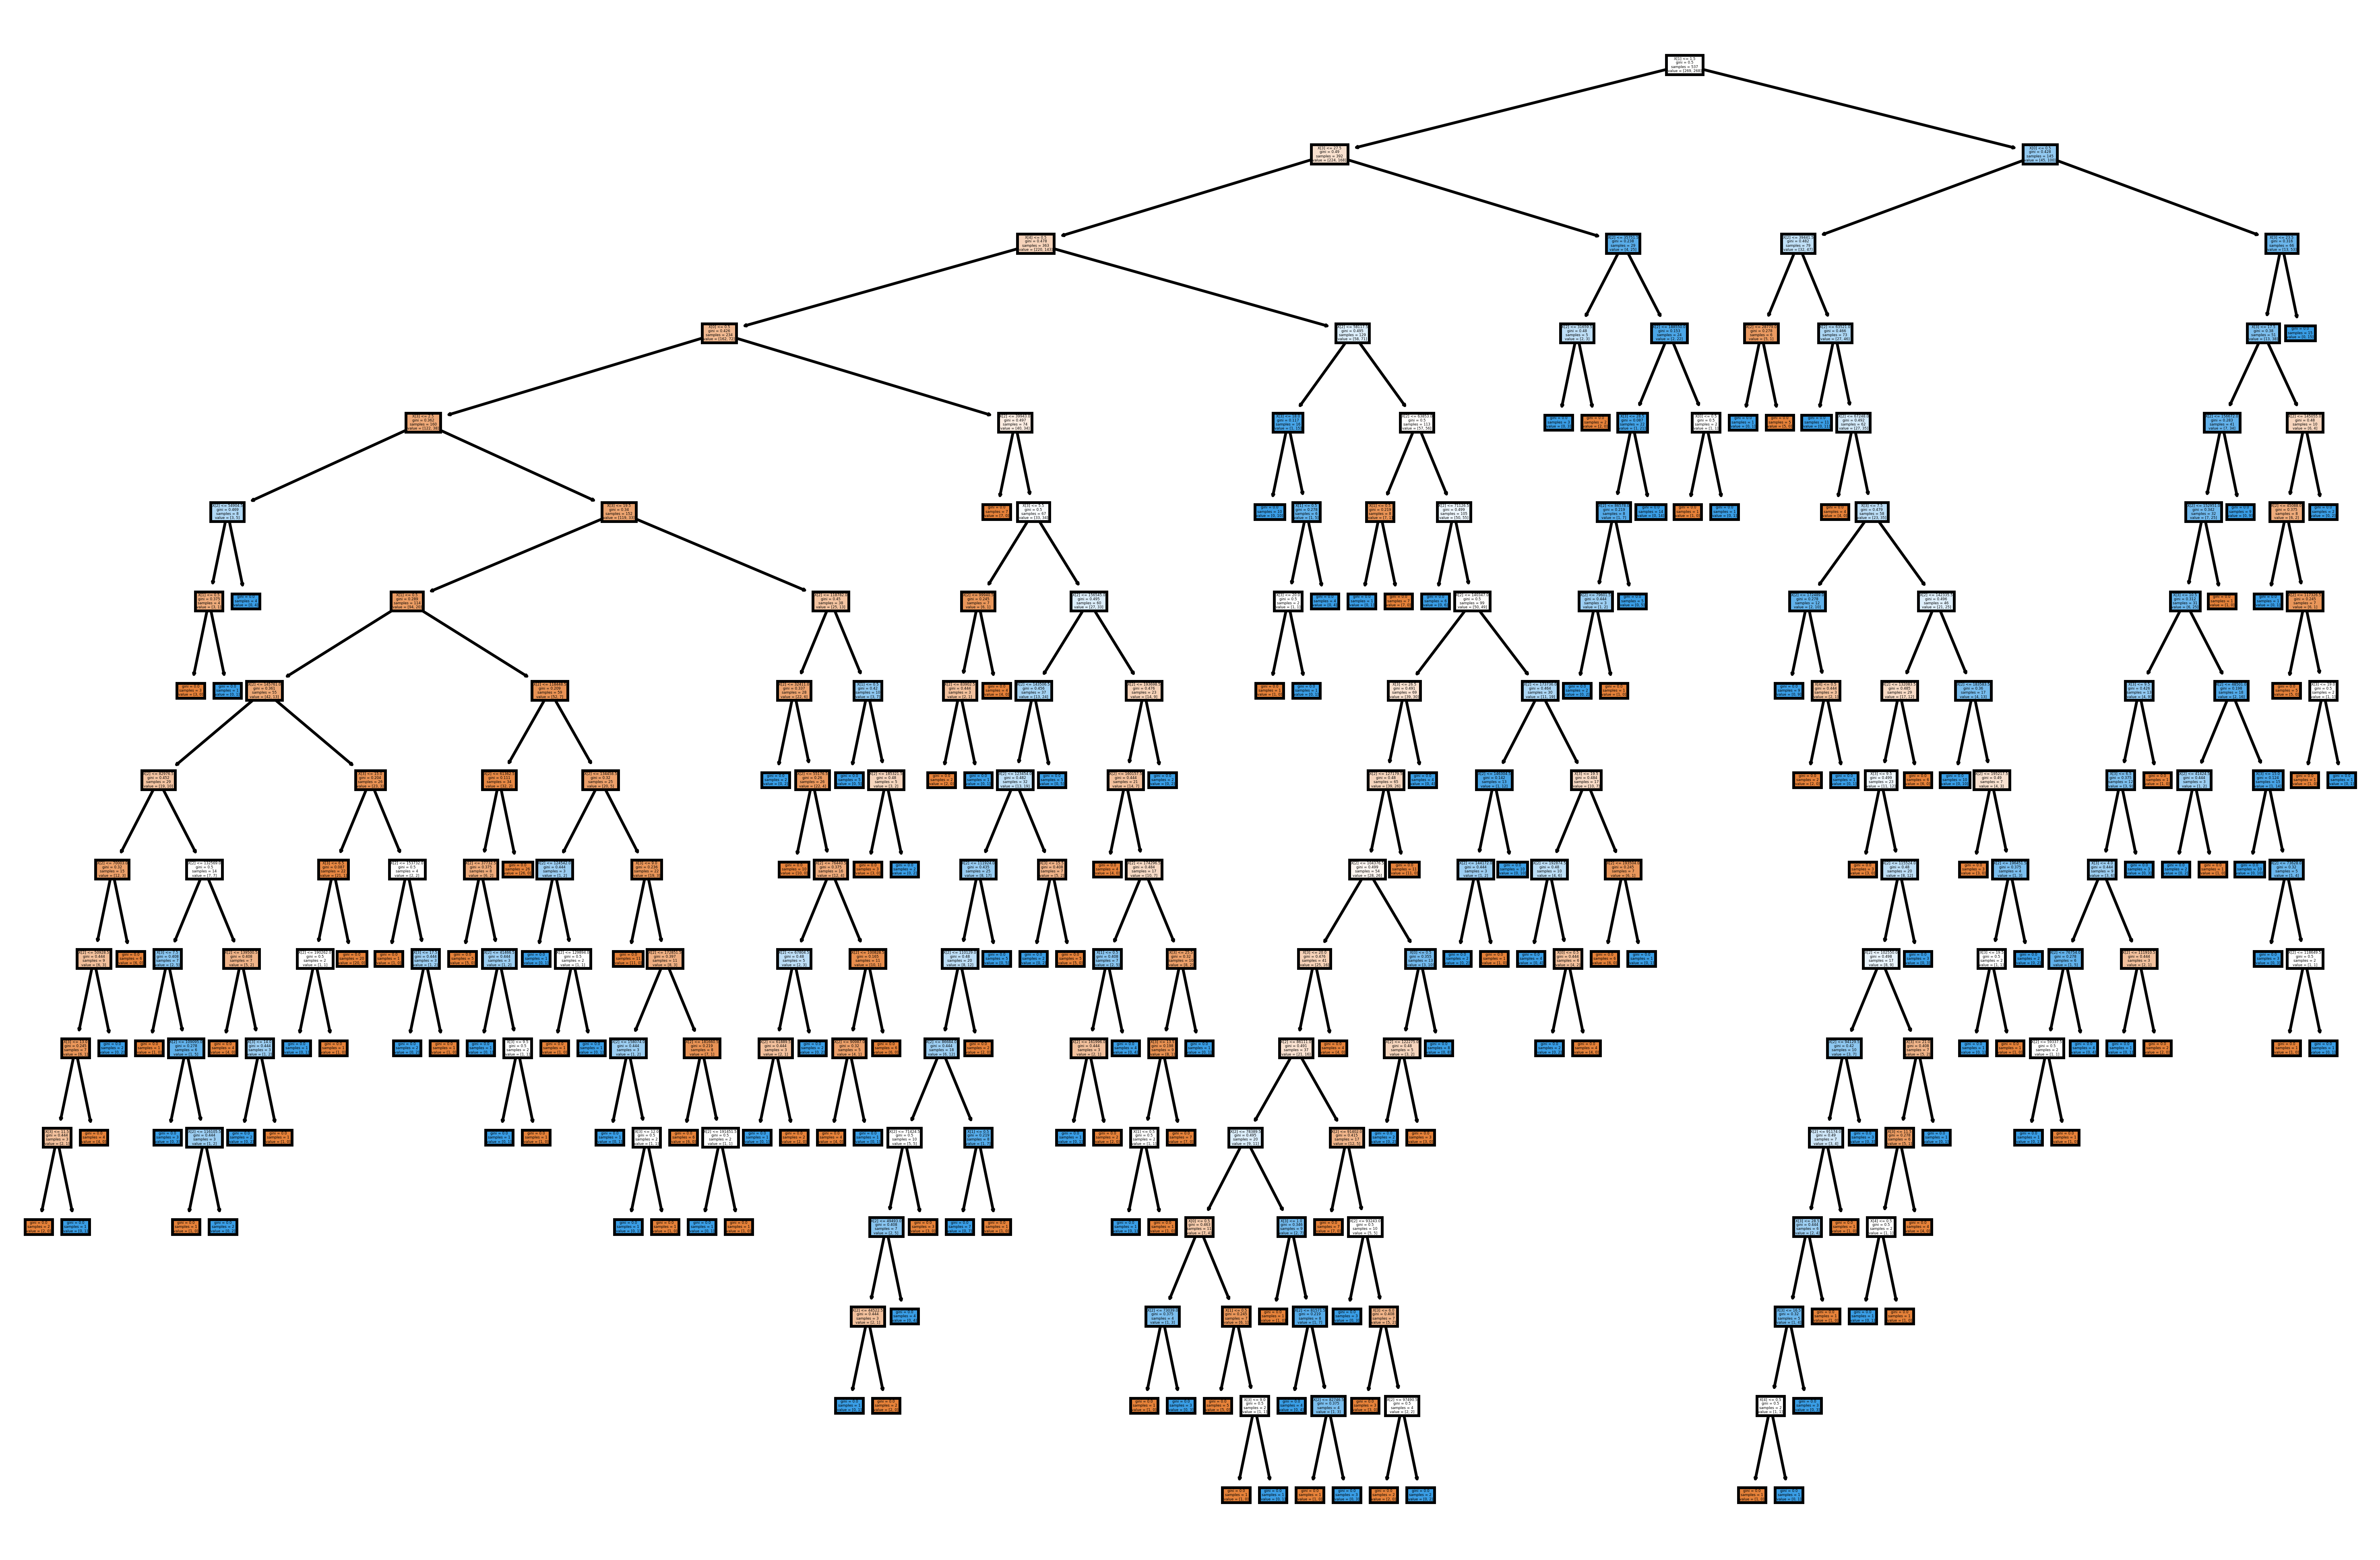

In [53]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model2,filled=True);

In [54]:
preds2=model2.predict(X_test)
pd.Series(preds2).value_counts()

1    69
0    66
dtype: int64

In [55]:
metrics.accuracy_score(Y_test,preds2)

0.7111111111111111

In [56]:
print(classification_report(Y_test,preds2))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71        67
           1       0.71      0.72      0.72        68

    accuracy                           0.71       135
   macro avg       0.71      0.71      0.71       135
weighted avg       0.71      0.71      0.71       135



# For Best value Of Tree

In [57]:
path = model2.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [58]:
ccp_alphas

array([0.        , 0.0011587 , 0.00116387, 0.00118503, 0.00124146,
       0.00124146, 0.00124146, 0.00139665, 0.00148976, 0.00155183,
       0.00155183, 0.00155183, 0.00157252, 0.00159617, 0.00159617,
       0.00159617, 0.00159617, 0.0016139 , 0.00162942, 0.00162942,
       0.00163648, 0.00165529, 0.00165929, 0.00169291, 0.00171895,
       0.00177755, 0.0017992 , 0.0018622 , 0.0019539 , 0.00209055,
       0.0022169 , 0.0022169 , 0.00223464, 0.00236765, 0.00237528,
       0.00239425, 0.00248293, 0.00248293, 0.00248293, 0.00248293,
       0.00252086, 0.00253466, 0.00264846, 0.00266028, 0.0027933 ,
       0.0027933 , 0.00283763, 0.00283763, 0.00298803, 0.00300734,
       0.0030412 , 0.00310366, 0.00319234, 0.00320598, 0.00325885,
       0.00335196, 0.00349769, 0.00359138, 0.00366084, 0.00372439,
       0.00387011, 0.00391061, 0.0040478 , 0.00416111, 0.00418994,
       0.00429738, 0.00443131, 0.0047711 , 0.00507495, 0.00528004,
       0.00549384, 0.00551714, 0.00579931, 0.00607862, 0.00928

In [59]:
clfs = []
for ccp_alpha in ccp_alphas:
    model2 = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    model2.fit(X_train, Y_train)
    clfs.append(model2)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))  

Number of nodes in the last tree is: 1 with ccp_alpha: 0.026871700901419326


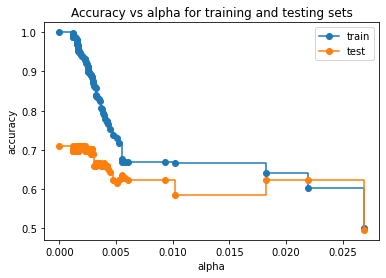

In [60]:
train_scores = [model2.score(X_train, Y_train) for model2 in clfs]
test_scores = [model2.score(X_test, Y_test) for model2 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [61]:
model3 = DecisionTreeClassifier(criterion='gini',random_state=0,ccp_alpha=0.0043)
model3.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0043, random_state=0)

In [62]:
pred3 = model3.predict(X_test)
pd.Series(pred3).value_counts()

1    85
0    50
dtype: int64

In [63]:
metrics.accuracy_score(Y_test,pred3)

0.6518518518518519

In [64]:
print(classification_report(Y_test,pred3))

              precision    recall  f1-score   support

           0       0.70      0.52      0.60        67
           1       0.62      0.78      0.69        68

    accuracy                           0.65       135
   macro avg       0.66      0.65      0.65       135
weighted avg       0.66      0.65      0.65       135



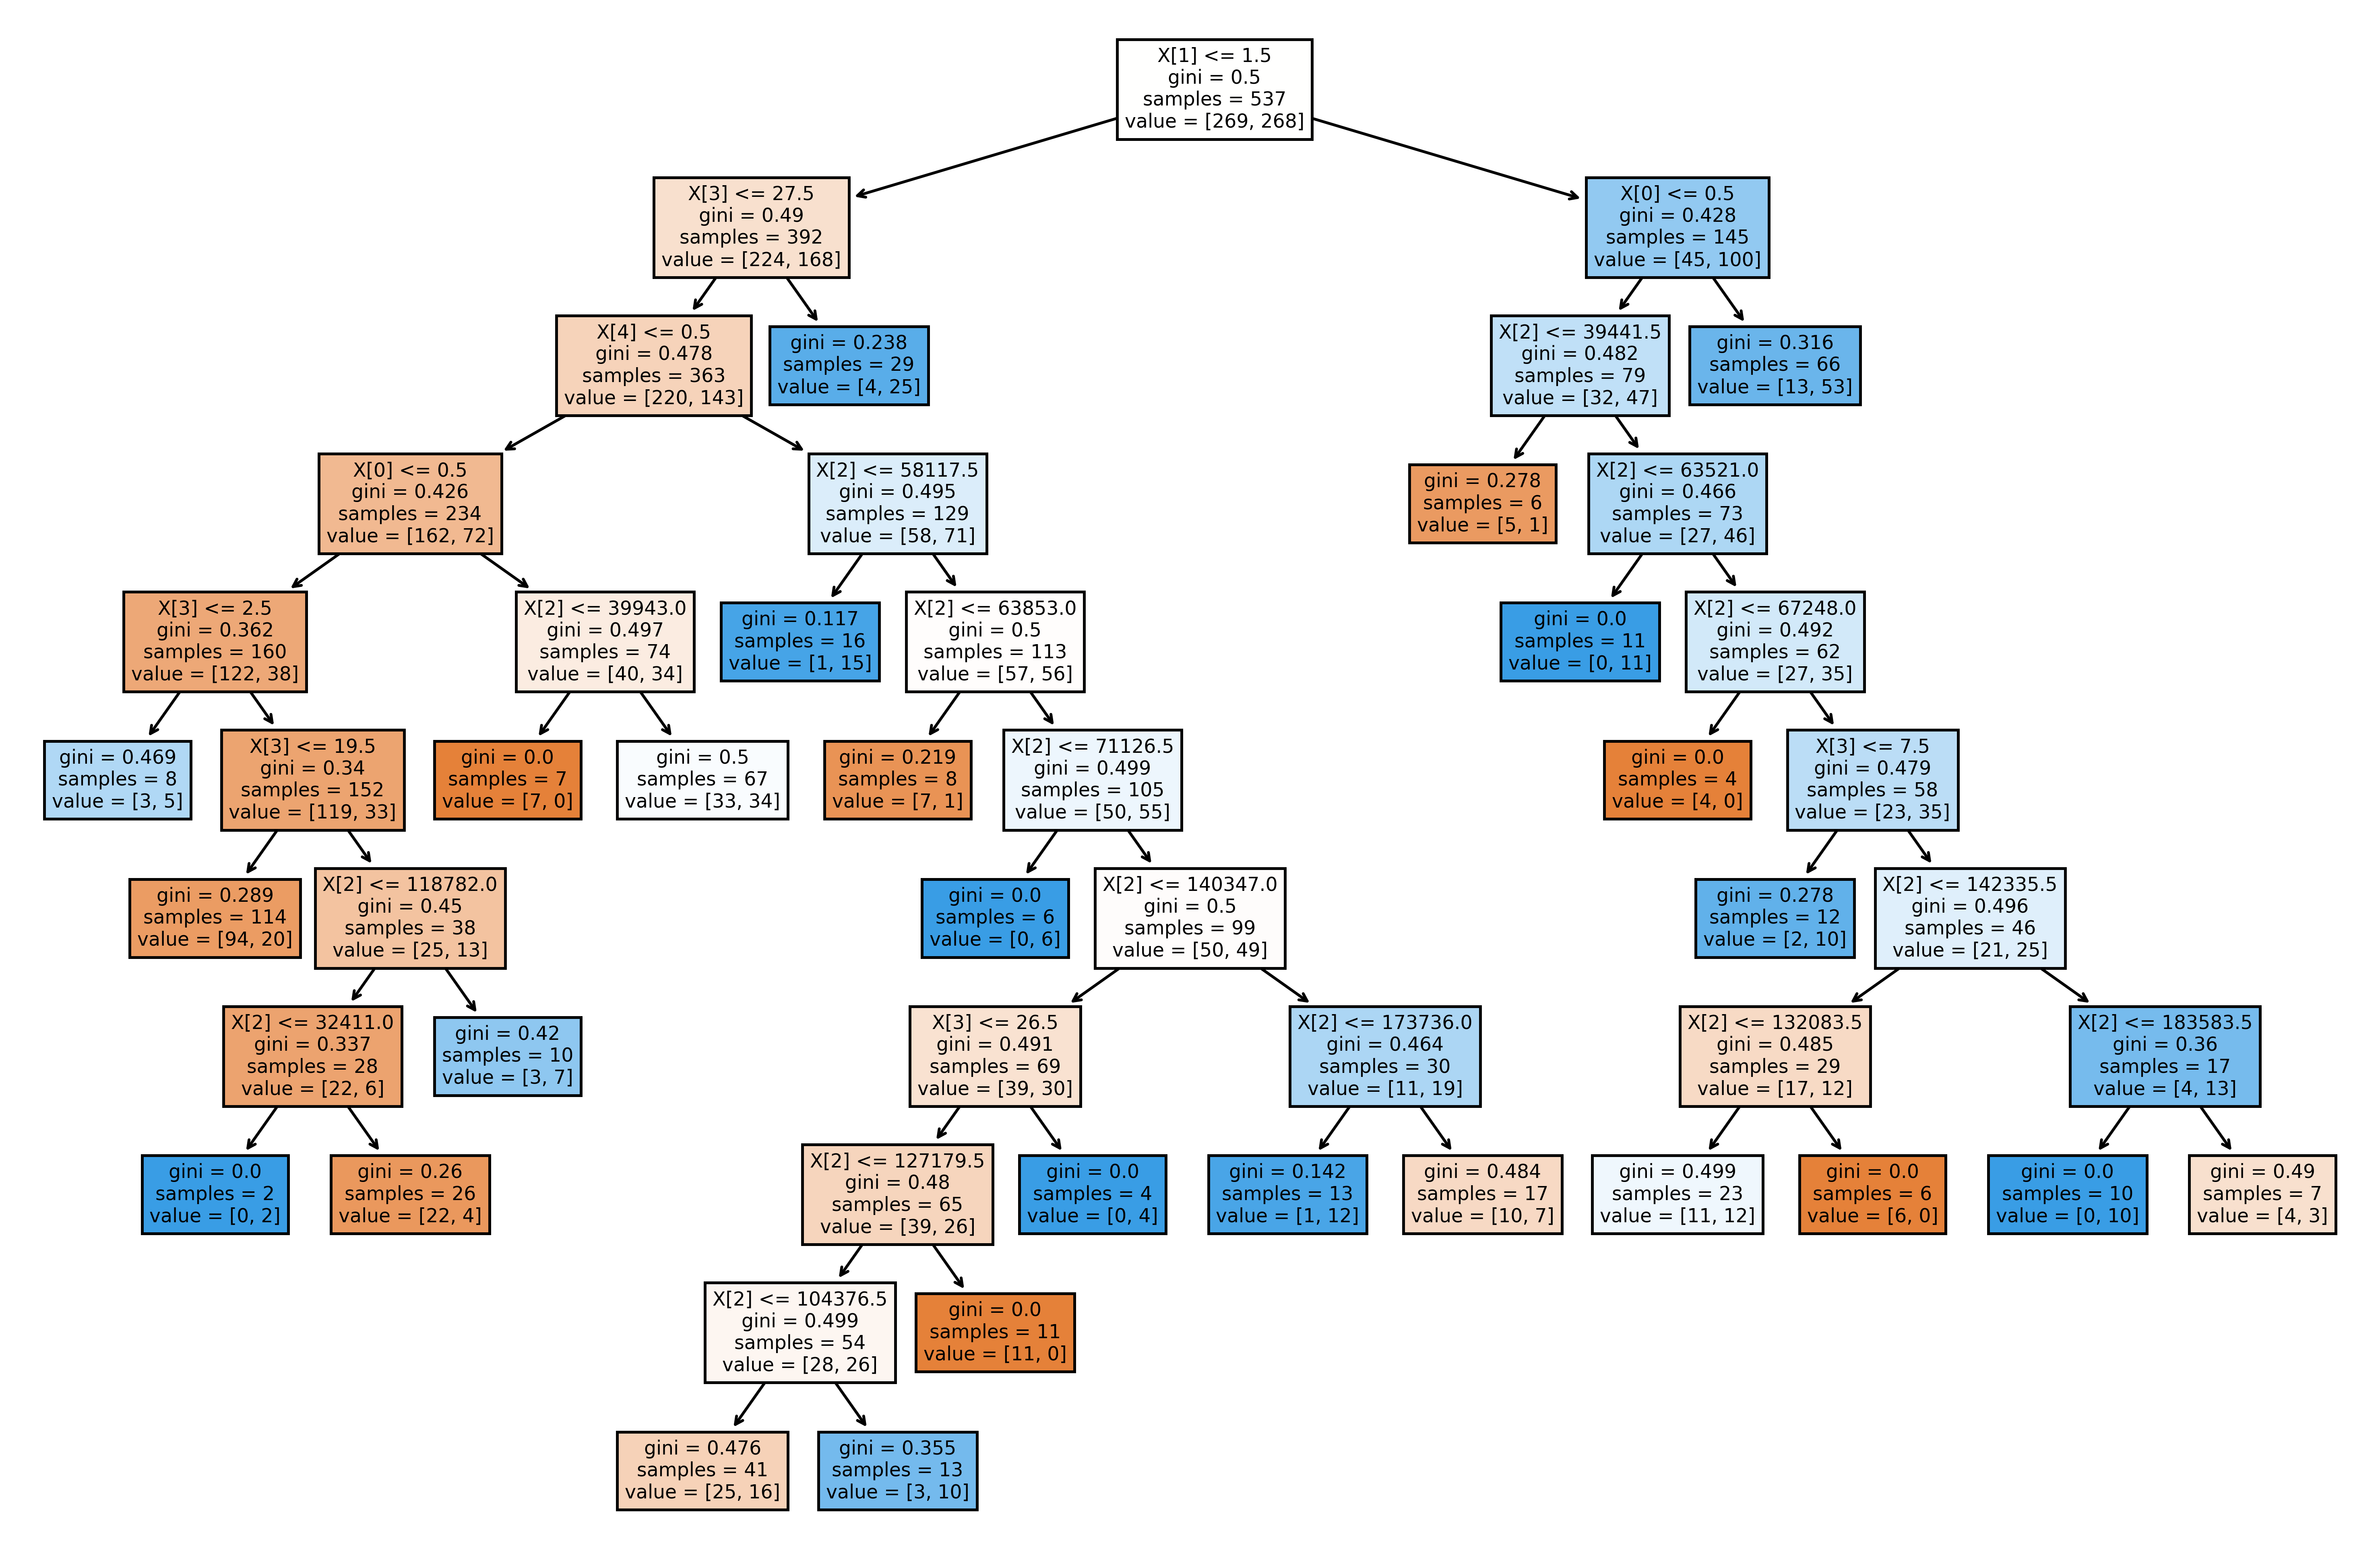

In [65]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model3,filled=True);

# Creating Decision Tree method=Entropy

## Creating Decision Tree using Pre puning method

In [66]:
model4 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model4.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

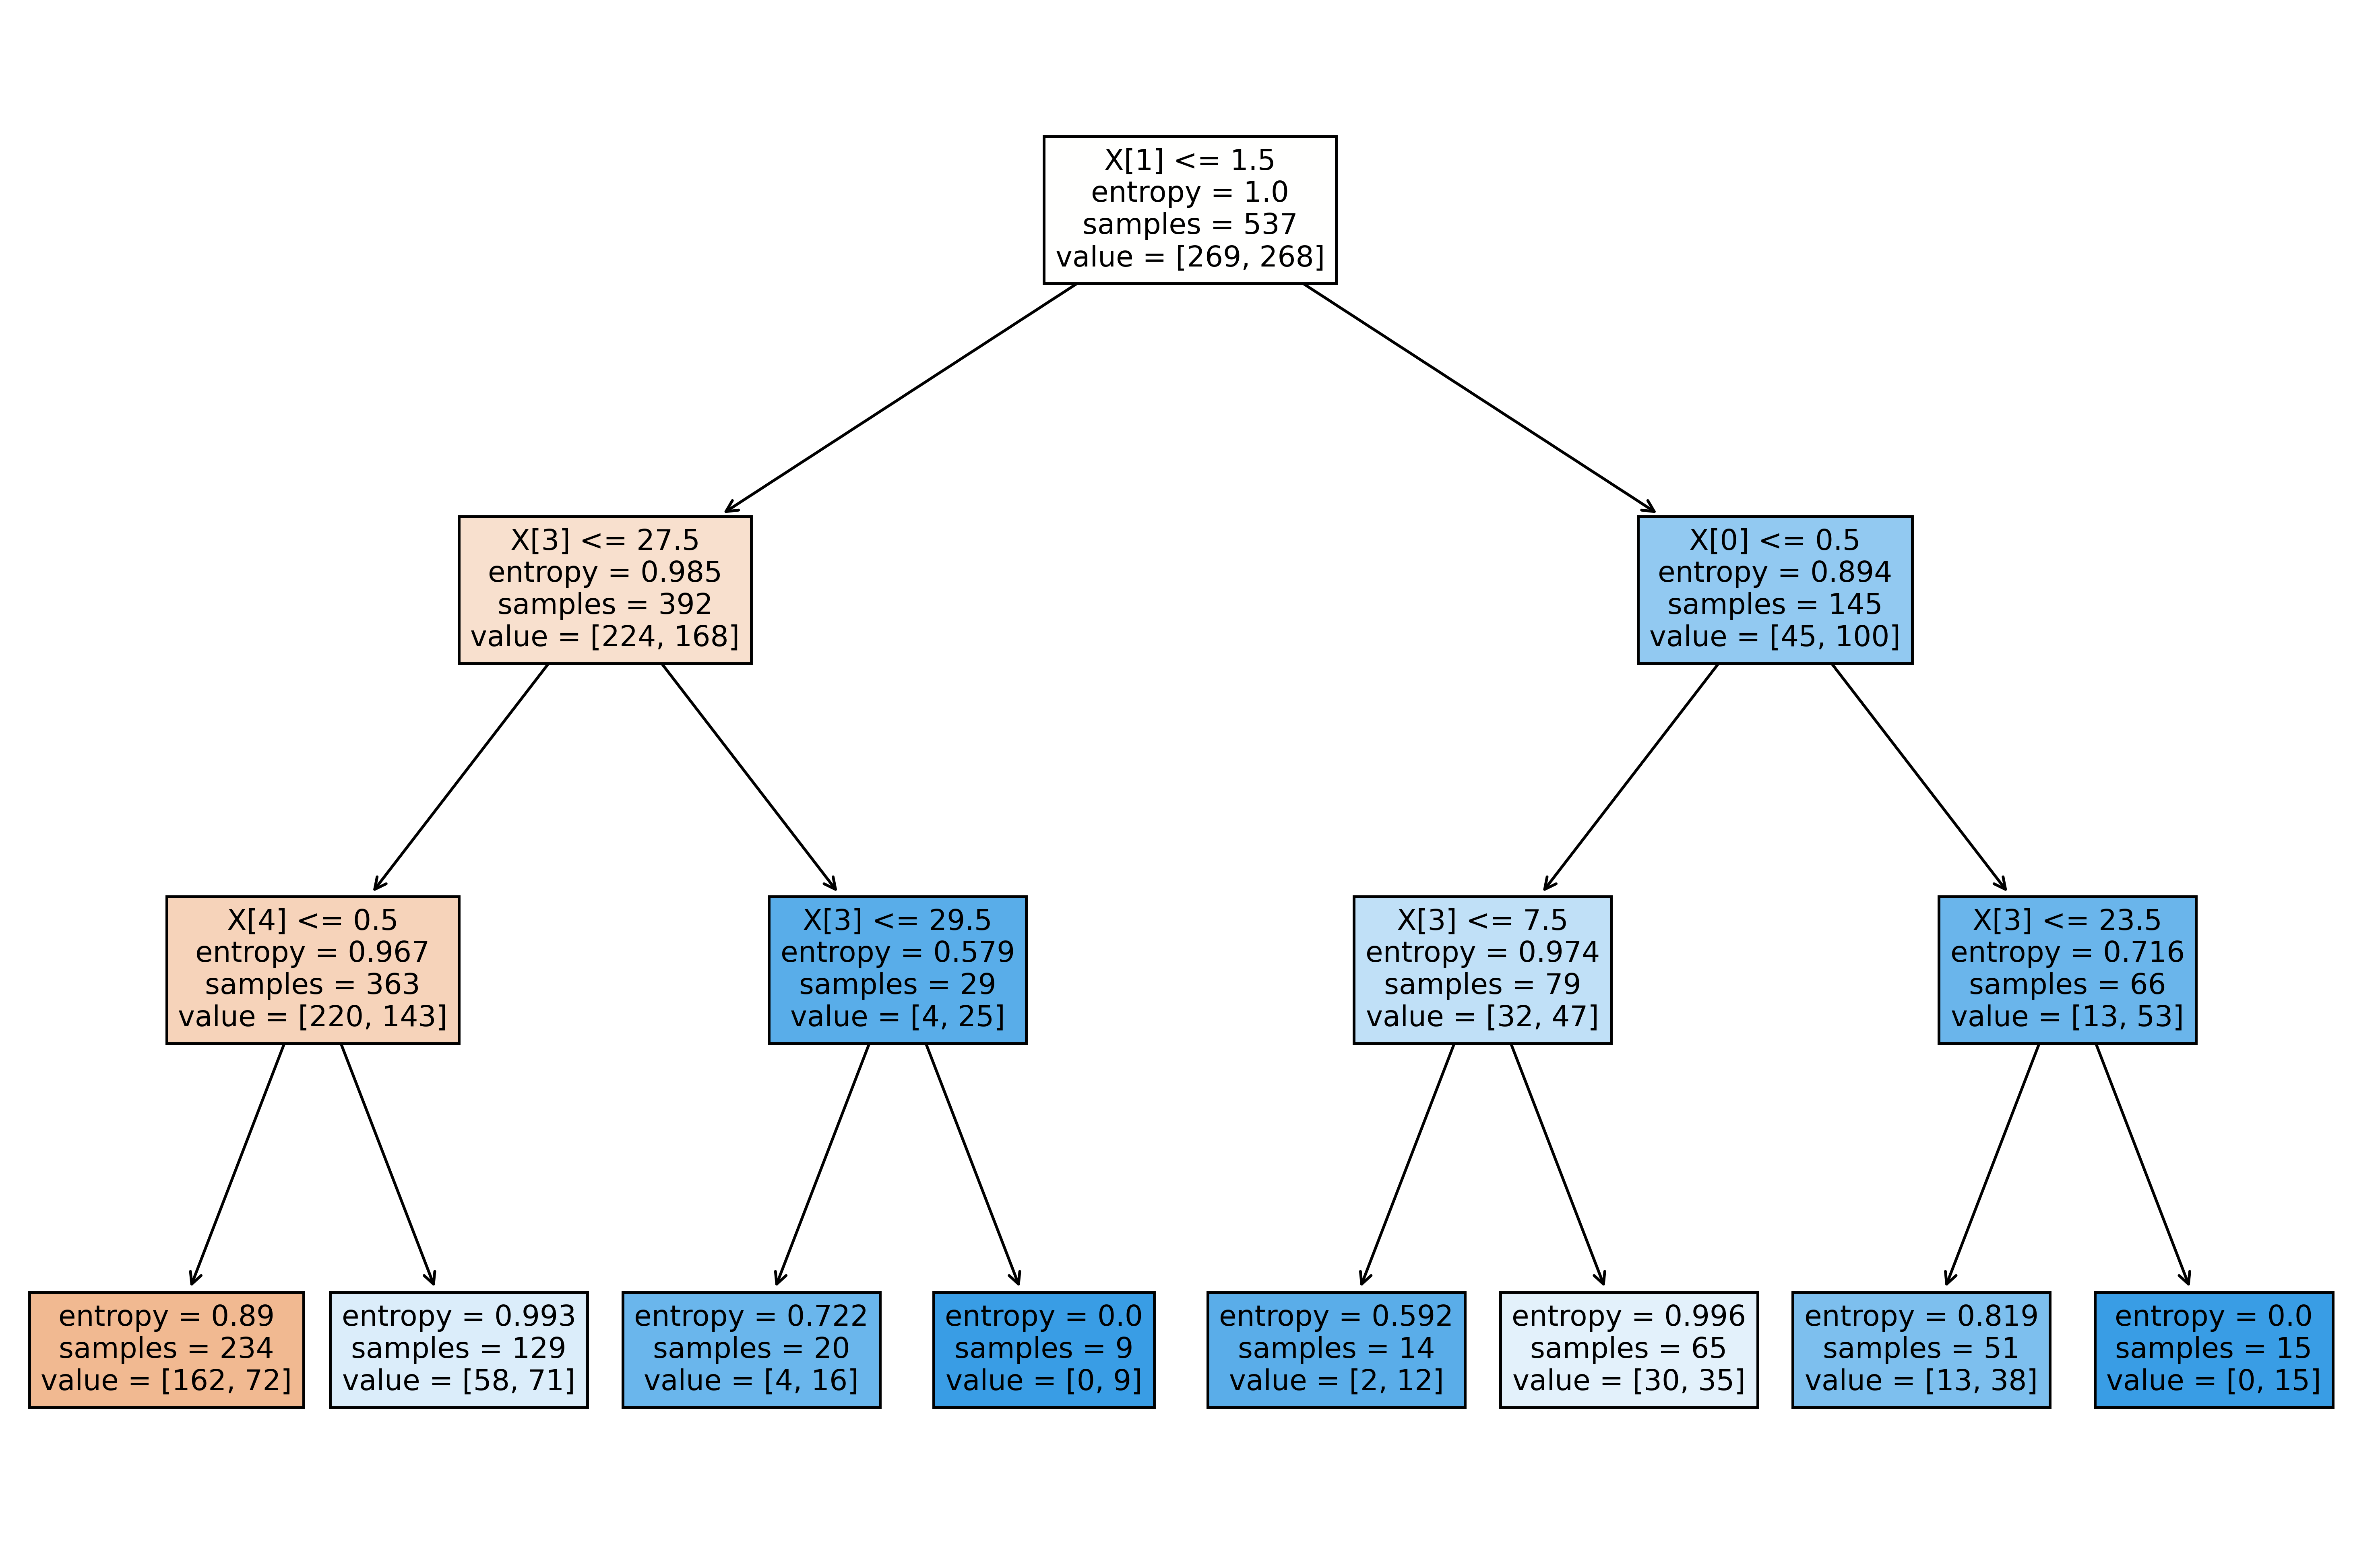

In [67]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model4,filled=True);

In [68]:
pred4 = model4.predict(X_test)
pd.Series(pred4).value_counts()

1    72
0    63
dtype: int64

In [69]:
metrics.accuracy_score(Y_test,pred4)

0.5851851851851851

In [70]:
print(classification_report(Y_test,pred4))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57        67
           1       0.58      0.62      0.60        68

    accuracy                           0.59       135
   macro avg       0.59      0.58      0.58       135
weighted avg       0.59      0.59      0.58       135



# Decision Tree using post pruning method = Entropy

In [71]:
model5= DecisionTreeClassifier(criterion='entropy',random_state=0)
model5.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

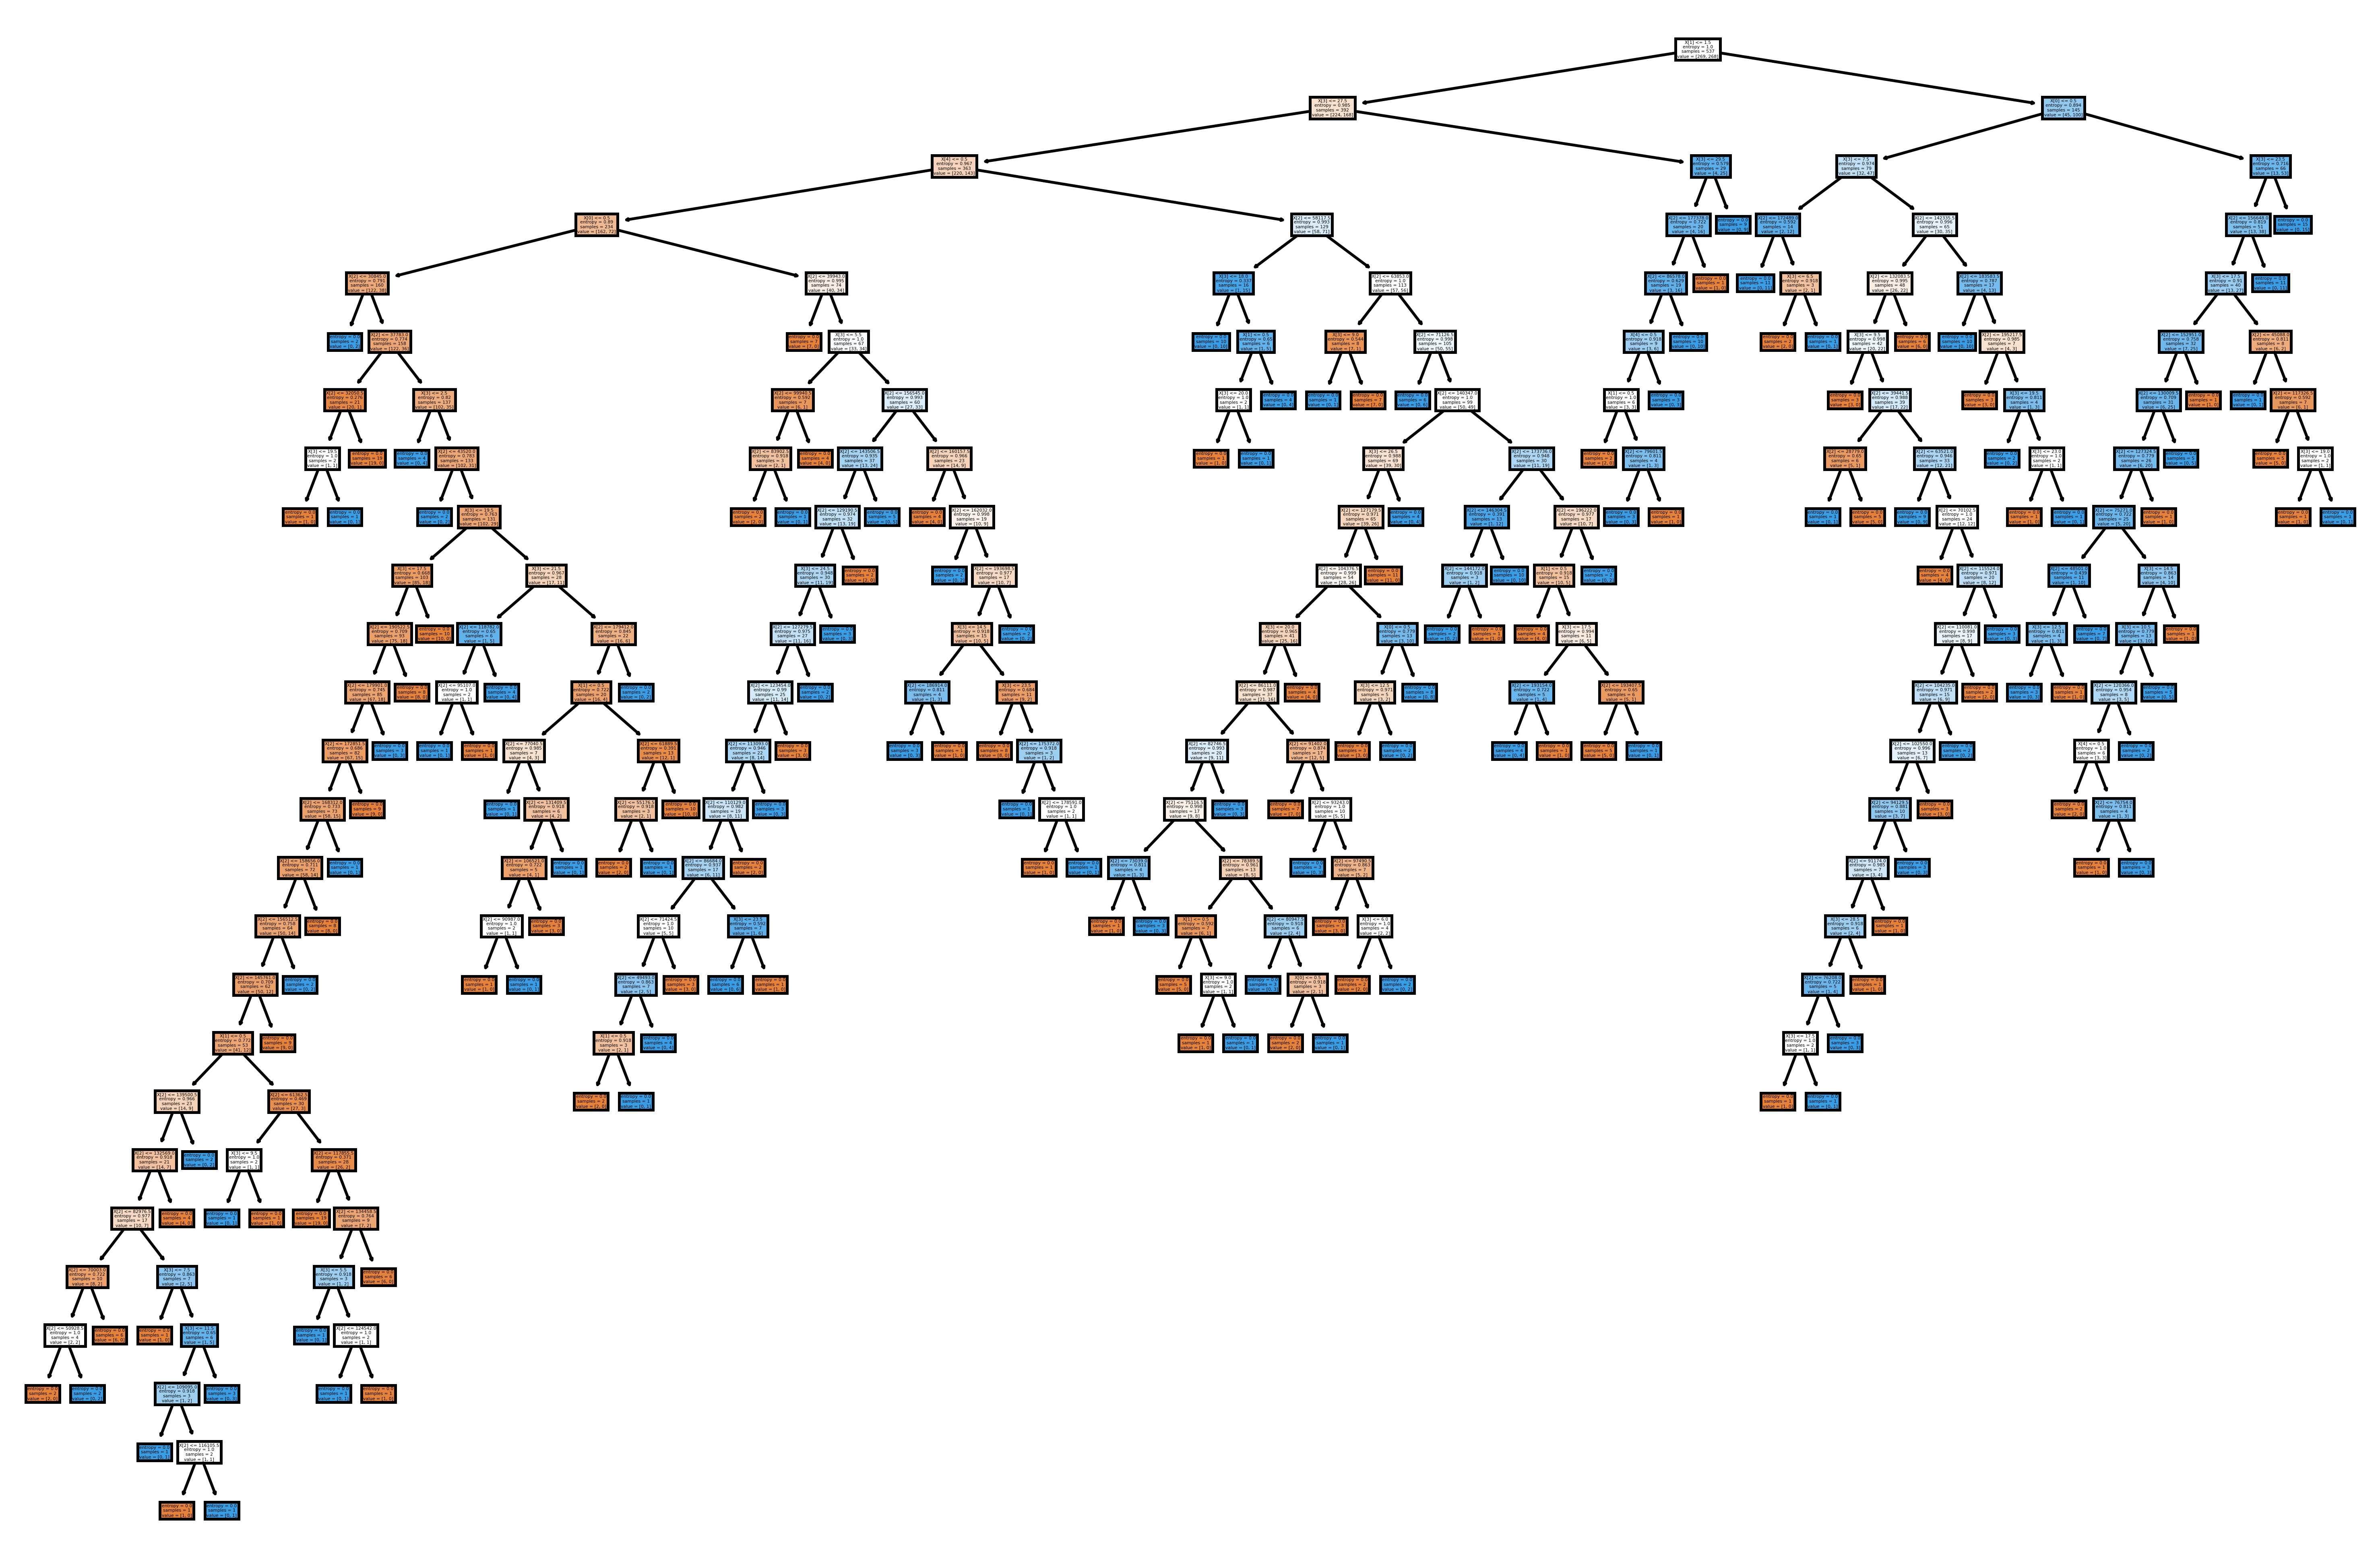

In [72]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model5,filled=True);

In [73]:
pred5=model5.predict(X_test)
pd.Series(pred5).value_counts()

0    69
1    66
dtype: int64

In [74]:
metrics.accuracy_score(Y_test,pred5)

0.7037037037037037

In [75]:
print(classification_report(Y_test,pred5))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        67
           1       0.71      0.69      0.70        68

    accuracy                           0.70       135
   macro avg       0.70      0.70      0.70       135
weighted avg       0.70      0.70      0.70       135



In [76]:
path = model5.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [77]:
ccp_alphas

array([0.        , 0.00242094, 0.00256507, 0.00256507, 0.00302152,
       0.00321071, 0.00321071, 0.00334987, 0.00356855, 0.00363141,
       0.00372439, 0.00372439, 0.00372439, 0.00372439, 0.00385634,
       0.00398829, 0.00398829, 0.00398829, 0.00409198, 0.00424247,
       0.0043734 , 0.00468154, 0.00473572, 0.00477312, 0.00493766,
       0.00513014, 0.00513014, 0.00513014, 0.00528888, 0.005294  ,
       0.00539655, 0.00562555, 0.00578211, 0.00596553, 0.00602152,
       0.00610997, 0.00618849, 0.00620994, 0.00636215, 0.00679978,
       0.00707654, 0.00726282, 0.00774517, 0.00779935, 0.00796683,
       0.00809779, 0.0085307 , 0.00870958, 0.0089282 , 0.00944143,
       0.01019203, 0.01024093, 0.01027442, 0.01240122, 0.01524965,
       0.01799463, 0.02737353, 0.03407147, 0.03951847])

In [78]:
clfs = []
for ccp_alpha in ccp_alphas:
    model5 = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    model5.fit(X_train, Y_train)
    clfs.append(model5)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))   

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03951846860794683


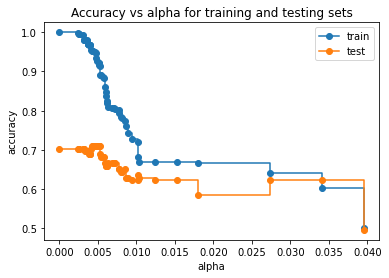

In [79]:
train_scores = [model5.score(X_train, Y_train) for model5 in clfs]
test_scores = [model5.score(X_test, Y_test) for model5 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [80]:
model6 = DecisionTreeClassifier(criterion="entropy",ccp_alpha=0.009)
model6.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy')

In [81]:
pred6=model6.predict(X_test)
pd.Series(pred6).value_counts()

1    78
0    57
dtype: int64

In [82]:
metrics.accuracy_score(Y_test,pred6)

0.6296296296296297

In [83]:
print(classification_report(Y_test,pred6))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        67
           1       0.62      0.71      0.66        68

    accuracy                           0.63       135
   macro avg       0.63      0.63      0.63       135
weighted avg       0.63      0.63      0.63       135



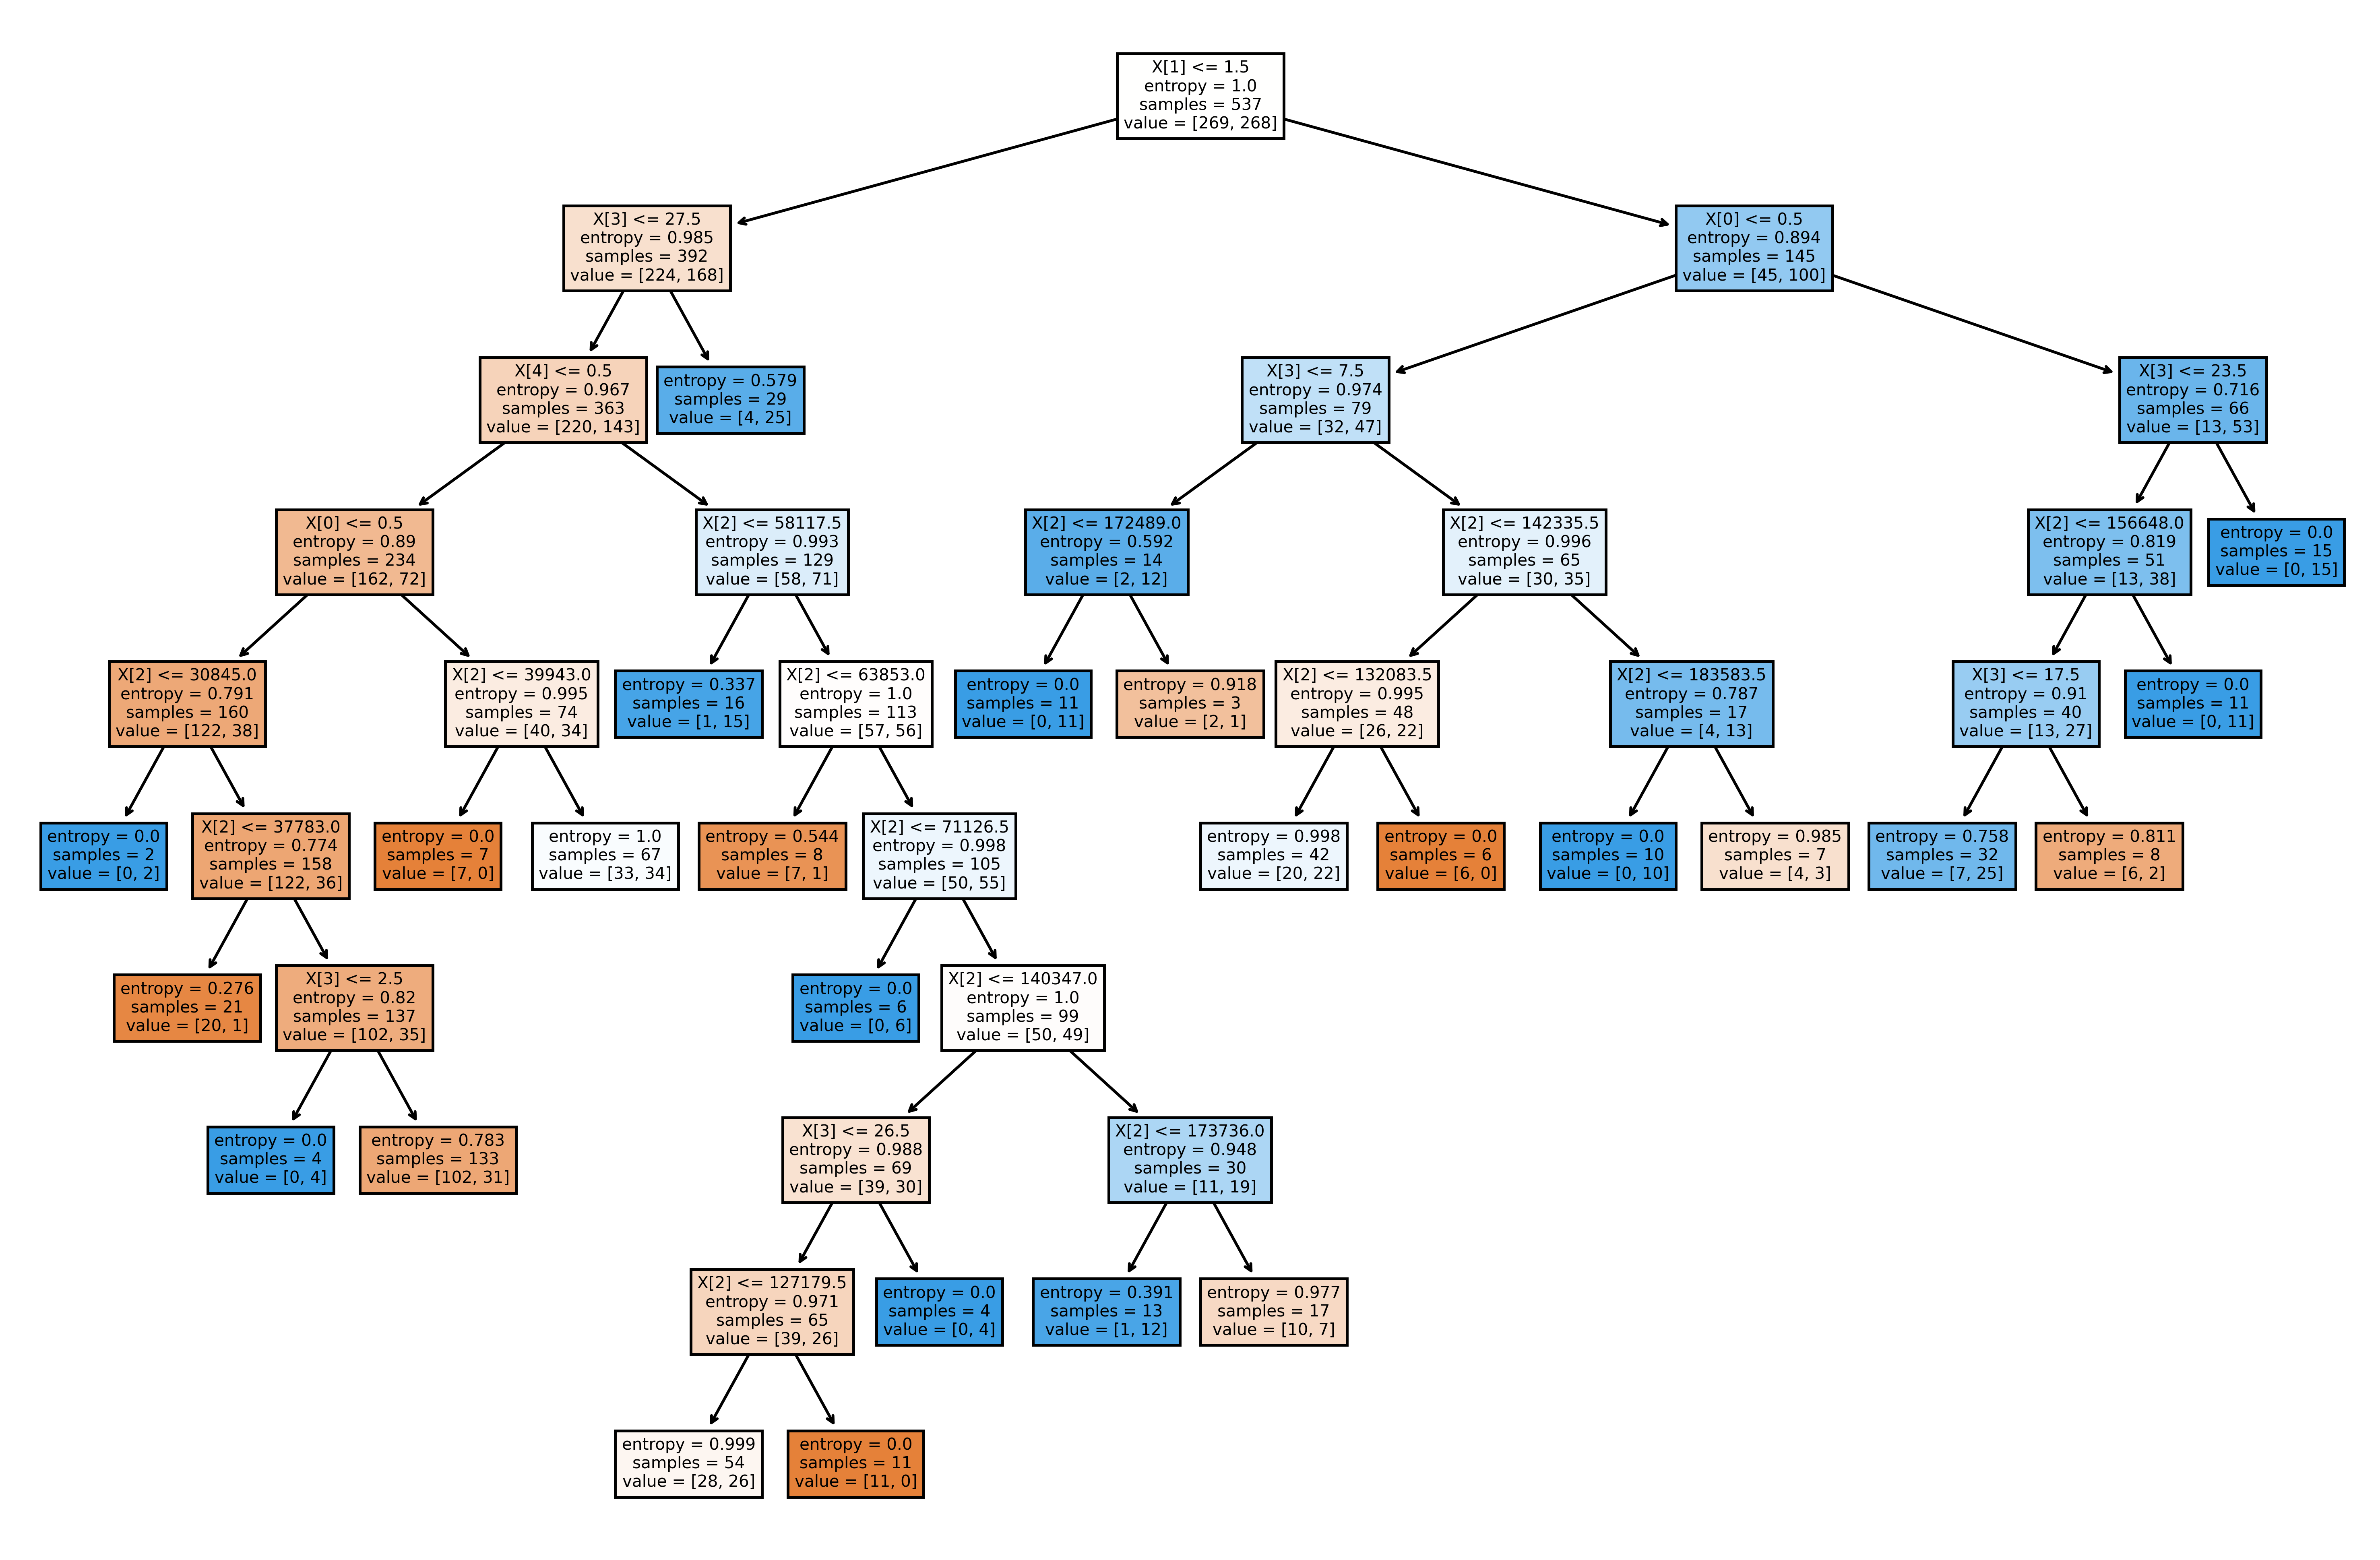

In [84]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model6,filled=True);

# Bagging

In [85]:
from sklearn.ensemble import BaggingClassifier

In [86]:
k_fold = KFold(n_splits=10)
Cart = DecisionTreeClassifier()
num_trees=100
bagging = BaggingClassifier(base_estimator=Cart,max_samples=0.8,n_estimators=num_trees,random_state=45)
results = cross_val_score(bagging,X,Y,cv=k_fold)
print(results.mean())

0.7449999999999999


In [87]:
bg=BaggingClassifier()

In [88]:
bg.fit(X_train,Y_train)

BaggingClassifier()

In [89]:
predict1 = bg.predict(X_test)
pd.Series(predict1).value_counts()

0    80
1    55
dtype: int64

In [90]:
metrics.accuracy_score(Y_test,predict1)

0.6962962962962963

In [91]:
cm1 = confusion_matrix(Y_test,predict1)
cm1

array([[53, 14],
       [27, 41]], dtype=int64)

Text(33.0, 0.5, 'Truth')

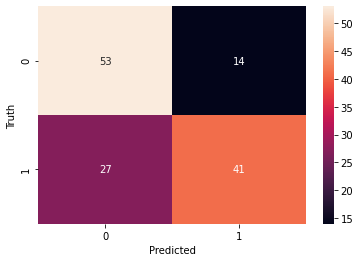

In [92]:
sns.heatmap(cm1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [93]:
print(classification_report(Y_test,predict1))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72        67
           1       0.75      0.60      0.67        68

    accuracy                           0.70       135
   macro avg       0.70      0.70      0.69       135
weighted avg       0.70      0.70      0.69       135



# RandomForest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
k_fold = KFold(n_splits=10)
Cart = DecisionTreeClassifier()
num_trees=100
max_features = 3
random_forest = RandomForestClassifier(max_samples=0.8,n_estimators=num_trees,oob_score=True,max_features=max_features,random_state=45)
results = cross_val_score(random_forest,X,Y,cv=k_fold)
print(results.mean())

0.7516666666666666


In [96]:
rf = RandomForestClassifier()

In [97]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [98]:
predict2=rf.predict(X_test)
pd.Series(predict2).value_counts()

0    73
1    62
dtype: int64

In [99]:
metrics.accuracy_score(Y_test,predict2)

0.6888888888888889

In [100]:
cm2= confusion_matrix(Y_test,predict2)
cm2

array([[49, 18],
       [24, 44]], dtype=int64)

Text(33.0, 0.5, 'Truth')

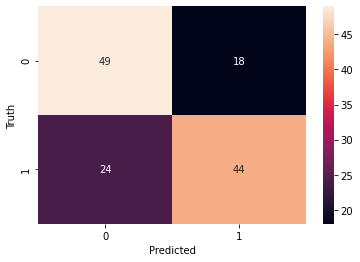

In [101]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [102]:
print(classification_report(Y_test,predict2))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        67
           1       0.71      0.65      0.68        68

    accuracy                           0.69       135
   macro avg       0.69      0.69      0.69       135
weighted avg       0.69      0.69      0.69       135



# AdaBoost

In [103]:
from sklearn.ensemble import AdaBoostClassifier

In [104]:
k_fold = KFold(n_splits=10)
Cart = DecisionTreeClassifier()
num_trees=10
seeds = 342
ada_boost = AdaBoostClassifier(n_estimators=num_trees,learning_rate=0.8,random_state=seeds)
results = cross_val_score(ada_boost,X,Y,cv=k_fold)
print(results.mean())

0.7916666666666666


In [105]:
ad = AdaBoostClassifier()

In [106]:
ad.fit(X_train,Y_train)

AdaBoostClassifier()

In [107]:
predict3=ad.predict(X_test)
pd.Series(predict3).value_counts()

1    72
0    63
dtype: int64

In [108]:
metrics.accuracy_score(Y_test,predict3)

0.7333333333333333

In [109]:
cm3= confusion_matrix(Y_test,predict3)
cm3

array([[47, 20],
       [16, 52]], dtype=int64)

Text(33.0, 0.5, 'Truth')

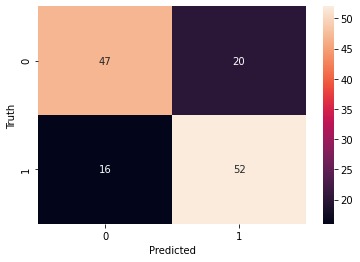

In [110]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [111]:
print(classification_report(Y_test,predict3))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        67
           1       0.72      0.76      0.74        68

    accuracy                           0.73       135
   macro avg       0.73      0.73      0.73       135
weighted avg       0.73      0.73      0.73       135

